In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
food_review_data = pd.read_csv('Reviews.csv')

In [4]:
food_review_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [5]:
food_review_data.shape

(568454, 10)

In [6]:
food_review_data['Sentiment'] = food_review_data['Score'].apply(lambda score: "Positive" if score > 3 else ("Negative" if score < 3 else "NAN"))

In [7]:
food_review_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

  Sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Negative  
4  Positive

In [8]:
food_review_data["Usefulness"] = (food_review_data["HelpfulnessNumerator"]/food_review_data["HelpfulnessDenominator"]).apply(lambda x: ">75%" if x > 0.75 else ("<25%" if x < 0.25 else ("25-75%" if x >= 0.25 and x <= 0.75 else "Useless")))

In [9]:
food_review_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

  Sentiment Usefulness  
0  Positive       >75%  
1  Negative    Useless  
2  Positive       >75%  
3  Negative       >75%  
4  Positive    Useless

In [10]:
food_review_data.loc[food_review_data.HelpfulnessDenominator == 0, 'Usefulness'] = ['Useless']

In [11]:
food_review_data.shape

(568454, 12)

In [12]:
positive_reviews = food_review_data.loc[food_review_data['Sentiment'] == 'Positive']
positive_reviews = positive_reviews[0:25000]

negative_reviews = food_review_data.loc[food_review_data['Sentiment'] == 'Negative']
negative_reviews = negative_reviews[0:25000]

In [20]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string

def create_Word_Corpus(reviews):
    words_concat = ''
    for r in reviews["Summary"]:
        text = str(r).lower()
        token = nltk.word_tokenize(text)
        token = [word for word in token if word not in stopwords.words('english')]
        for words in token:
            words_concat = words_concat + words + ' '
    return words_concat
        
positive_wordcloud = WordCloud(width=1600, height=800, background_color='White').generate(create_Word_Corpus(positive_reviews))
negative_wordcloud = WordCloud(width=1600, height=800, background_color='Black').generate(create_Word_Corpus(negative_reviews))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Venkatesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
def word_cloud_image(wordCloud):
    plt.figure(figsize=(20,10), facecolor=None)
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

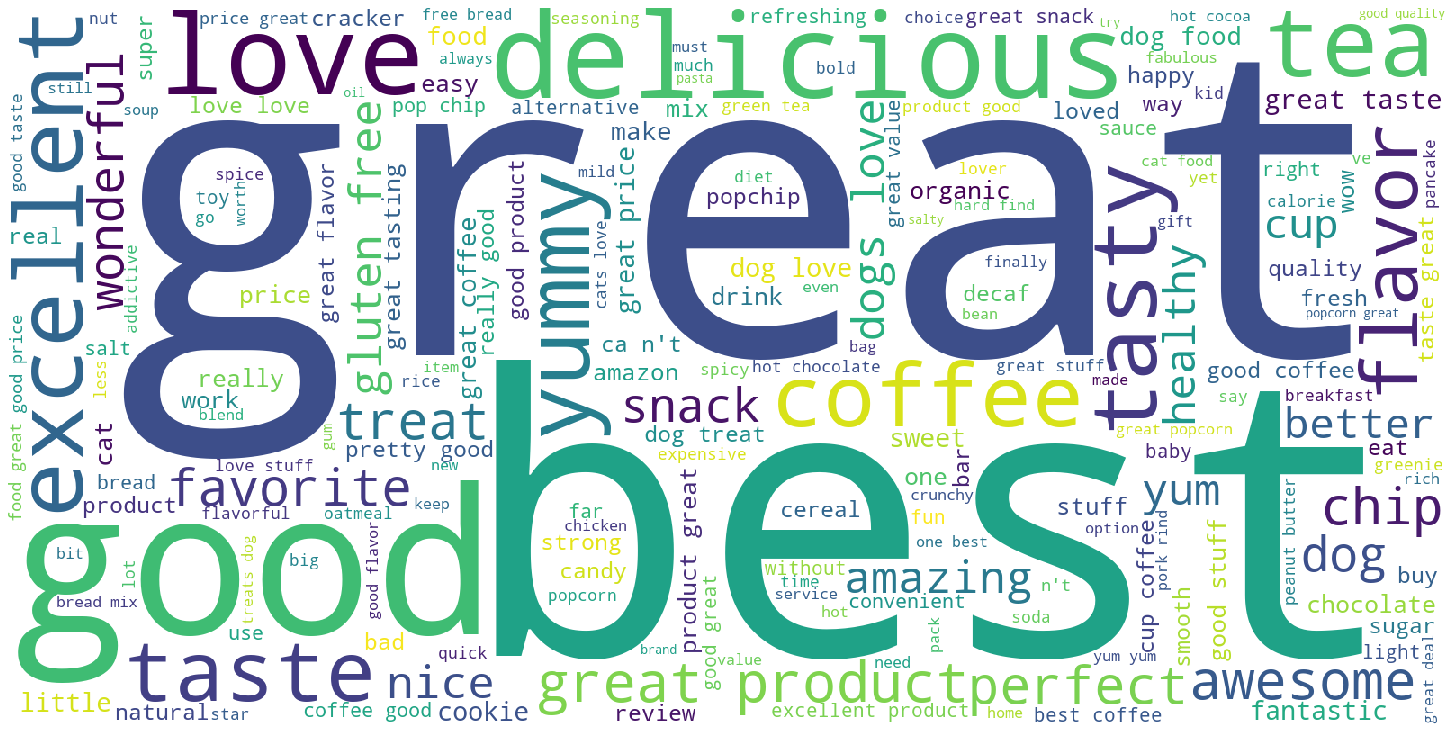

In [19]:
word_cloud_image(positive_wordcloud)

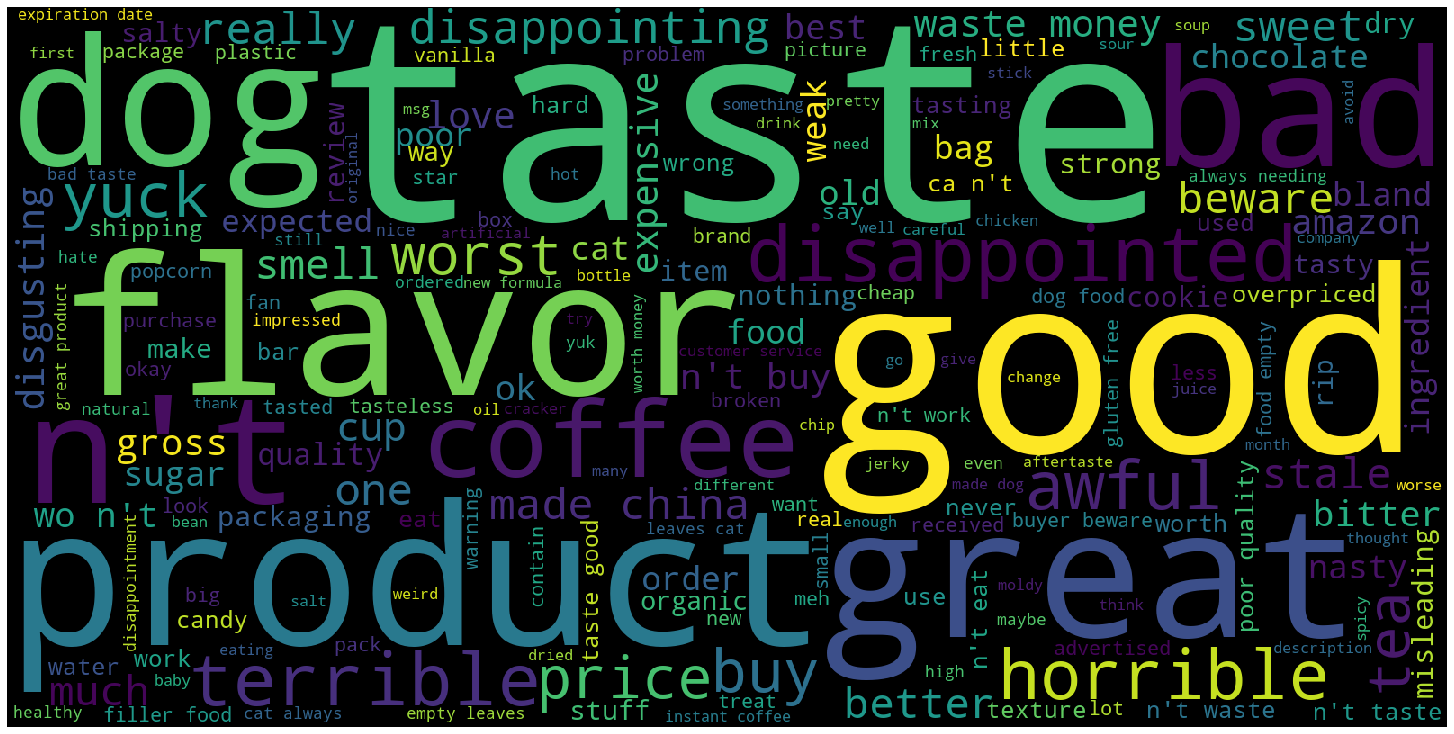

In [21]:
word_cloud_image(negative_wordcloud)

In [29]:
User_counts = food_review_data['UserId'].value_counts()
User_counts.to_dict()

{'A3OXHLG6DIBRW8': 448,
 'A1YUL9PCJR3JTY': 421,
 'AY12DBB0U420B': 389,
 'A281NPSIMI1C2R': 365,
 'A1Z54EM24Y40LL': 256,
 'A1TMAVN4CEM8U8': 204,
 'A2MUGFV2TDQ47K': 201,
 'A3TVZM3ZIXG8YW': 199,
 'A3PJZ8TU8FDQ1K': 178,
 'AQQLWCMRNDFGI': 176,
 'A2SZLNSI5KOQJT': 175,
 'A29JUMRL1US6YP': 172,
 'AZV26LP92E6WU': 167,
 'A31N6KB160O508': 162,
 'AY1EF0GOH80EK': 162,
 'A2FRFAQCWZJT3Q': 161,
 'A1UQBFCERIP7VJ': 157,
 'AKMEY1BSHSDG7': 155,
 'A1LZJZIHUPLDV4': 154,
 'A1WX42M589VAMQ': 151,
 'A2Y8IDC1FKGNJC': 150,
 'A3D6OI36USYOU1': 150,
 'A3HPCRD9RX351S': 149,
 'AKZKG2Z7CNV27': 143,
 'A2PNOU7NXB1JE4': 143,
 'A33AQPJYH7UUXR': 142,
 'A35R32TA60XD57': 141,
 'A1IU7S4HCK1XK0': 140,
 'A1X1CEGHTHMBL1': 135,
 'A36WGHR8TO5DKT': 134,
 'A2DPYMNI2HCIOI': 133,
 'AQLL2R1PPR46X': 133,
 'A3FY3H6F4249E0': 127,
 'A1HRYC60VTMYC0': 126,
 'A2GEZJHBV92EVR': 125,
 'ADS5APY1NKTL4': 125,
 'A3FKGKUCI3DG9U': 124,
 'ALSAOZ1V546VT': 123,
 'A3F3B1JPACN215': 121,
 'A1P2XYD265YE21': 120,
 'A2XNOB1T796Y6B': 119,
 'A36MP37DITBU6F': 118,
 

In [30]:
food_review_data['FrequentReviewers'] = food_review_data['UserId'].apply(lambda counts : "Frequent" if User_counts[counts] > 50 else "Not Frequent")
food_review_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

  Sentiment Usefulness Frequent_Reviewers FrequentReviewers  
0  Positive       >75%       Not Frequent      Not Frequent  
1  Negative    Useless       Not Frequent      Not Frequent  
2  Positive       >75%       Not Frequent      Not Frequent  
3  Negative       >75%       Not Frequent      Not Frequent  
4  Positive    Useless       Not Frequent      Not Frequent

In [42]:
food_review_data['WordCount'] = food_review_data['Text'].apply(lambda x: len(x.split()))

In [43]:
food_review_data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

  Sentiment Usefulness Frequent_Reviewers FrequentReviewers  WordCount  
0  Positive       >75%       Not Frequent      Not Frequent         48  
1  Negative    Useless       Not Frequent      Not Frequent         31  
2  Positive       >75%       Not Frequent      Not Frequent         94  
3  Negative       >75%       Not Frequent      Not Frequent         41  
4  Positive    Useless       Not Frequent      Not Frequent         27

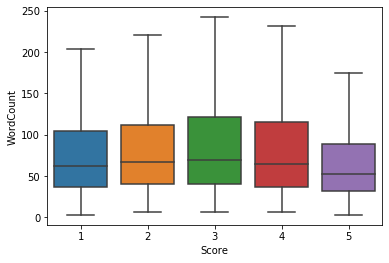

In [49]:
sns.boxplot(x='Score',y='WordCount',data=food_review_data,showfliers=False)
plt.show()

In [52]:
food_review_data.drop('Frequent_Reviewers',axis=1,inplace=True)

In [53]:
food_review_data.shape

(568454, 14)

Text(0.5, 1.0, 'Frequent (>50 reviews) Distribution')

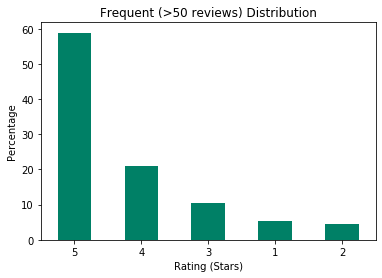

In [64]:
y = food_review_data[food_review_data.FrequentReviewers=="Frequent"].Score.value_counts()
tot_y = y.sum()
y = (y/tot_y)*100
frq = y.plot(kind="bar", colormap = 'summer', rot=0)
plt.xlabel("Rating (Stars)")
plt.ylabel("Percentage")
plt.title("Frequent (>50 reviews) Distribution")

Text(0.5, 1.0, 'Frequent (<50 reviews) Distribution')

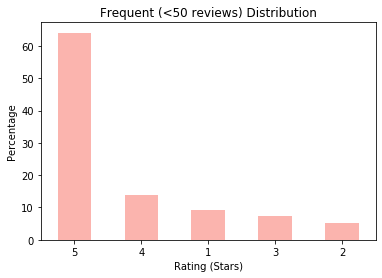

In [65]:
x = food_review_data[food_review_data.FrequentReviewers=="Not Frequent"].Score.value_counts()
tot_x = x.sum()
x = (x/tot_x)*100
freqq = x.plot(kind="bar", colormap = 'Pastel1', rot=0)
plt.xlabel("Rating (Stars)")
plt.ylabel("Percentage")
plt.title("Frequent (<50 reviews) Distribution")